In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [2]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ063MH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ063MH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
dataset_iterator = ds.as_numpy_iterator()

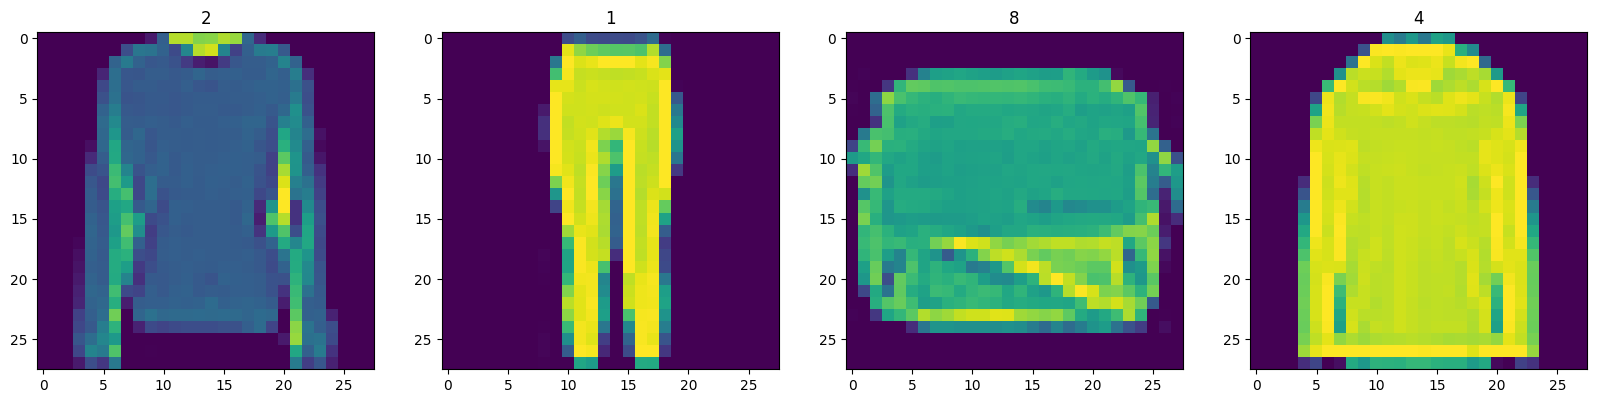

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
  batch = dataset_iterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [9]:
np.squeeze(batch['image']).shape

(28, 28)

In [10]:
batch['image'].shape

(28, 28, 1)

In [19]:
def scale_images(data):
  image = data['image']
  return image / 255

In [32]:
data = tfds.load('fashion_mnist', split='train')

data = data.map(scale_images)

data = data.cache()

data = data.shuffle(60000)

data = data.batch(128)

data = data.prefetch(60)

In [33]:
data.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [104]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [105]:
generator = build_generator()
generator.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [149]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 141ms/step


(4, 28, 28, 1)

1/1 [==============================] - 0s 143ms/step


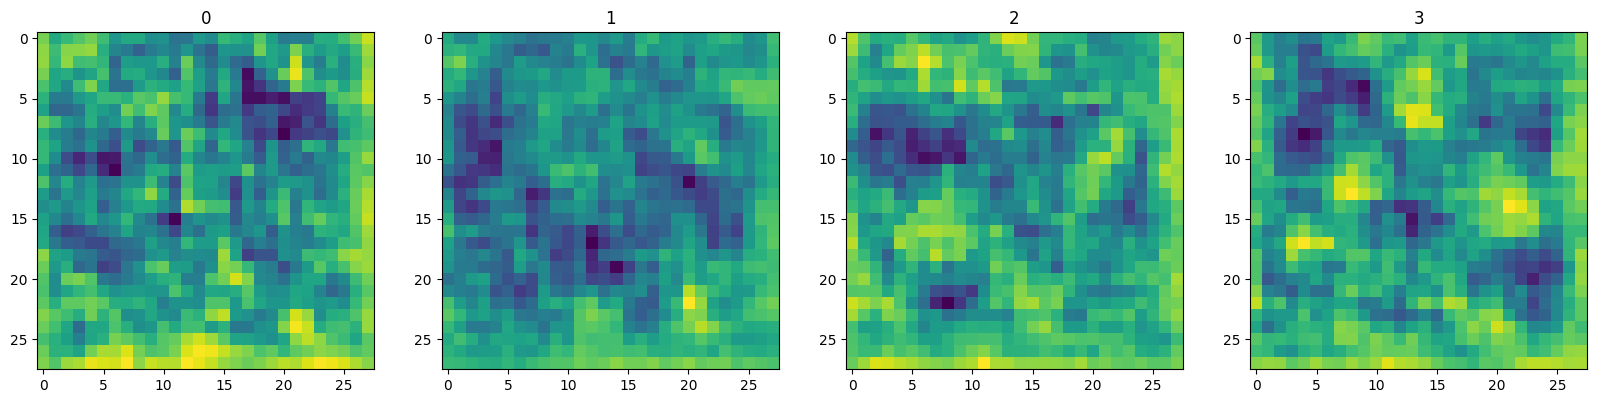

In [137]:
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [132]:
def build_descriminator():
  model = Sequential()
  model.add(Conv2D(32, 5,  input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [133]:
discriminator = build_descriminator()
discriminator.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_11 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 128)     

In [151]:
img = img[0]
img.shape

(28, 28, 1)

In [153]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 38ms/step


array([[0.49508113]], dtype=float32)